In [1]:
import cv2
import matplotlib.pyplot as plt

In [2]:
config_file = 'ssd_mobilenet_v3_large_coco_2020_01_14.pbtxt'
frozen_model = 'frozen_inference_graph.pb'

In [3]:
model = cv2.dnn_DetectionModel(frozen_model,config_file)

In [4]:
classLabels = []
file_name = 'Labels.txt'
with open(file_name,'rt') as fpt:
    classLabels = fpt.read().rstrip('\n').split('\n')

In [5]:
print(classLabels)

['person', 'bicycle', 'car', 'motorbike', 'aeroplane', 'bus', 'train', 'truck', 'boat', 'traffic light', 'fire hydrant', 'stop sign', 'parking meter', 'bench', 'bird', 'cat', 'dog', 'horse', 'sheep', 'cow', 'elephant', 'bear', 'zebra', 'giraffe', 'backpack', 'umbrella', 'handbag', 'tie', 'suitcase', 'frisbee', 'skis', 'snowboard', 'sports ball', 'kite', 'baseball bat', 'baseball glove', 'skateboard', 'surfboard', 'tennis racket', 'bottle', 'wine glass', 'cup', 'fork', 'knife', 'spoon', 'bowl', 'banana', 'apple', 'sandwich', 'orange', 'broccoli', 'carrot', 'hot dog', 'pizza', 'donut', 'cake', 'chair', 'sofa', 'pottedplant', 'bed', 'diningtable', 'toilet', 'tvmonitor', 'laptop', 'mouse', 'remote', 'keyboard', 'cell phone', 'microwave', 'oven', 'toaster', 'sink', 'refrigerator', 'book', 'clock', 'vase', 'scissors', 'teddy bear', 'hair drier', 'toothbrush']


In [6]:
print(len(classLabels))

80


In [7]:
model.setInputSize(320,320)
model.setInputScale(1.0/127.5)
model.setInputMean((127.5,127.5,127.5))
model.setInputSwapRB(True)

< cv2.dnn.Model 00000291D2BBEAB0>

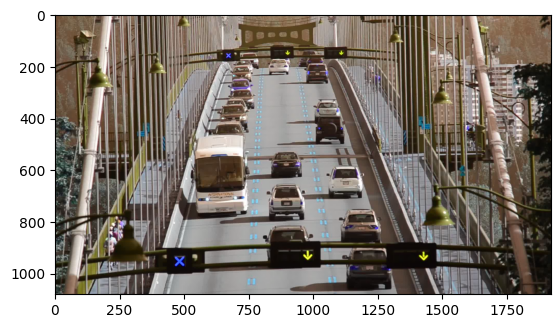

In [8]:
img = cv2.imread('ezgif-frame-001_OZzxdny.jpg')
plt.imshow(img)

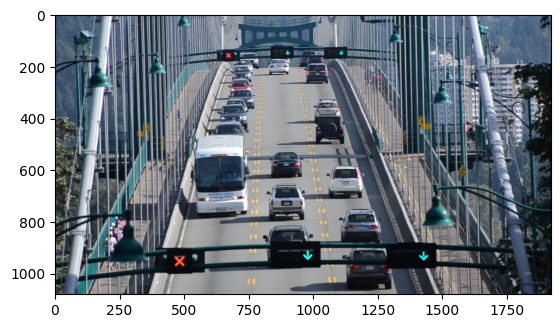

In [9]:
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))

In [10]:
ClassIndex, confidence, bbox = model.detect(img,confThreshold=0.5)

In [11]:
print(ClassIndex)


[ 3  3  3 10  3  3  3  3 10  3 10 10  6 10  3  3 10]


In [12]:
font_scale = 3
font = cv2.FONT_HERSHEY_PLAIN
for ClassInd, conf, boxes in zip(ClassIndex.flatten(),confidence.flatten(), bbox):
    cv2.rectangle(img,boxes,(255, 0, 0), 2)
    cv2.putText(img,classLabels[ClassInd-1],(boxes[0]+10,boxes[1]+40), font, fontScale=font_scale,color=(0, 255, 0),thickness=3)

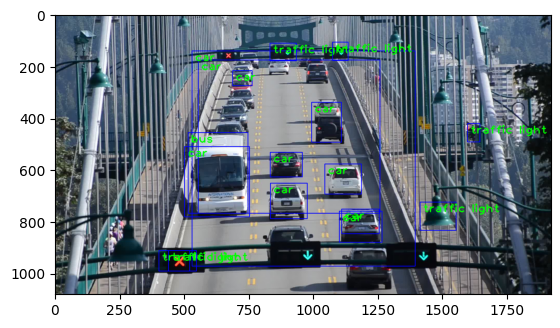

In [13]:
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))

In [15]:
cap = cv2.VideoCapture("sample-20s.mp4")

if not cap.isOpened():
    cap = cv2.VideoCapture(0)
if not cap.isOpened():
    raise IOError("Cannot open video")

font_scale = 3
font = cv2.FONT_HERSHEY_COMPLEX

while True:
    ret,frame = cap.read()
    
    ClassIndex, confidence, bbox = model.detect(frame, confThreshold=0.5)
    
    print(ClassIndex)
    if(len(ClassIndex)!=0):
        for ClassInd, conf, boxes in zip(ClassIndex.flatten(), confidence.flatten(), bbox):
            if(ClassInd<=80):
                 cv2.rectangle(frame,boxes,(255, 0, 0), 2)
                 cv2.putText(frame,classLabels[ClassInd-1],(boxes[0]+10,boxes[1]+40), font, fontScale=font_scale,color=(0, 255, 0),thickness=3)
    
    cv2.imshow('Object Detection Tutorial',frame)
    
    if cv2.waitKey(2) & 0xFF == ord('q'):
        break
    
cap.release()
cv2.destroyAllWindows()

()
()
()
()
()
()
()
()
()
()
[3 1]
()
[3]
[3]
[3]
()
[3]
[3]
[3]
()
()
[3]
()
()
()
()
()
()
()
()
[3]
[3]
[3]
[3]
[1 1 3]
[3]
[1 1 3]
[3]
[1]
()
[1 1]
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
[3]
()
()
()
()
()
()
()
()
()
()
()
()
[10]
()
()
[1]
()
()
()
()
()
()
[3]
()
()
()
()
[3]
()
()
()
()
()
()
()
()
()
()
()
()
[1 1]
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
[3]
()
()
()
()
()
()
[10]
[10]
[10]
[10]
()
()
()
()
()
()
()
()
()
[1]
()
()
()
()
[1]
()
[1]
()
()
[3]
()
()
()
[1 1]
()
[3]
[3 3]
[3]
[3]
[3]
[3 3]
[3 3]
[3 3 3]
[3 3 3]
[3 3]
[3 3]
[3 3]
[3]
[3]
[3]
[3]
[3]
[3]
[3]
[3]
[3]
[3 3 3]
[3 3 3]
[3 3]
[3 3]
[3 3 3 3]
[3 3 3]
[3 3 3]
[3 3 3]
[3 3 3]
[3 3 3 3]
[3 3 3]
[3 3 3]
[3 3]
[3 3 3 3]
[3 3 3]
[3 3]
[3 3 3]
[3 3 3]
[3 3 3]
[3 3 3 3]
[3 3 3 3 3]
[3 3 3 3 3]
[3 3 3 3]
[3 3 3 3 3]
[3 3 3]
[3 3 3 3]
[3 3 3 3]
[3 3 3 3]
[3 3 3 3]
[3 3 3 3 3]
[3 3 3 3]
[3 3 3]
[3]
[1]
[3 1 1 1 3]
()
[3]
[3]
[3 3]
[3 3 3]
[3 3 3]
[3 3]
[3 3 3]
[3 3 3]
[3 3 3]
[3 3]
[3 3 1

error: OpenCV(4.6.0) D:\a\opencv-python\opencv-python\opencv\modules\imgproc\src\resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'cv::resize'


In [ ]:
cap = cv2.VideoCapture(1)

if not cap.isOpened():
    cap = cv2.VideoCapture(0)
if not cap.isOpened():
    raise IOError("Cannot open webcam")

font_scale = 3
font = cv2.FONT_HERSHEY_COMPLEX

while True:
    ret,frame = cap.read()
    
    ClassIndex, confidence, bbox = model.detect(frame, confThreshold=0.5)
    
    print(ClassIndex)
    if(len(ClassIndex)!=0):
        for ClassInd, conf, boxes in zip(ClassIndex.flatten(), confidence.flatten(), bbox):
            if(ClassInd<=80):
                 cv2.rectangle(frame,boxes,(255, 0, 0), 2)
                 cv2.putText(frame,classLabels[ClassInd-1],(boxes[0]+10,boxes[1]+40), font, fontScale=font_scale,color=(0, 255, 0),thickness=3)
    
    cv2.imshow('Object Detection Tutorial',frame)
    
    if cv2.waitKey(2) & 0xFF == ord('q'):
        break
    
cap.release()
cv2.destroyAllWindows()